In [1]:
import sys
sys.path.insert(0,"./src")

import numpy as np
import matplotlib.pyplot as plt
import HybridTNS
import matplotlib.gridspec as gridspec

In [2]:
%%time


params = {'h':0.67,'Omega_cdm':0.319-0.049, 'Omega_b':0.049,'YHe':0.24,'T_cmb':2.7255,
          'N_eff':3.046,'N_ncdm':0,'n_s':0.960, 'A_s':2.0e-09,'s8':0.83,
          'output': 'mPk','z_pk':0.58, 'gauge':'synchroton'}

#params = {'h':0.7,'Omega_cdm':0.239, 'Omega_b':0.047,'YHe':0.24,'T_cmb':2.7255,
#          'N_eff':3.046,'N_ncdm':0,'n_s':0.960, 'A_s':2.14681e-09,'s8':None,
#          'output': 'mPk','P_k_max_h/Mpc': '200.0','z_pk':0.55, 'gauge':'synchroton'}


model = HybridTNS.model(params,lmax=4,FoG_type="",saveout=True,filepath="./")

Rescaling pklin given the input s8
TNS model ready
CPU times: user 5min 6s, sys: 2.56 s, total: 5min 9s
Wall time: 1min 36s


In [3]:
p = model.cosmoparams
print(p.keys())

dict_keys(['Om0', 'z', 'Om', 'D_A', 'D_M', 'h', 'H_z', 'D_H', 'D_V', 'r_drag', 'DM_rd', 'DH_rd', 'DV_rd', 'f', 's8', 'A_s', 'n_s', 'fs8'])


In [4]:
theory = model.theory
print(theory.keys())

dict_keys(['k', 'Pk_lin', 'Pdd', 'Pdt', 'Ptt', 'kcorr', 'Id2', 'Ig2', 'Fg2', 'Id2theta', 'Ig2theta', 'Fg2theta', 'Id2d2', 'Id2g2', 'Ig2g2', 'cosmo', 'A11', 'A12', 'A22', 'A23', 'A33', 'B111', 'B112', 'B121', 'B122', 'B211', 'B212', 'B221', 'B222', 'B312', 'B321', 'B322', 'B422'])


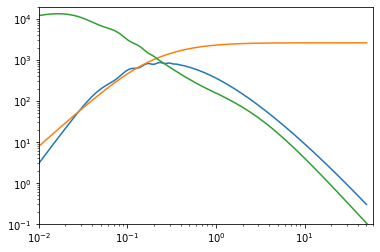

In [5]:
#plt.loglog(theory['kcorr'],-theory['A12'])
plt.xlim(1e-2,6e1)
plt.ylim(1e-1,2e4)
plt.loglog(theory['kcorr'],(theory['A11']))
plt.loglog(theory['kcorr'],(theory['Id2d2']))
plt.loglog(theory['k'],theory['Pdd'])

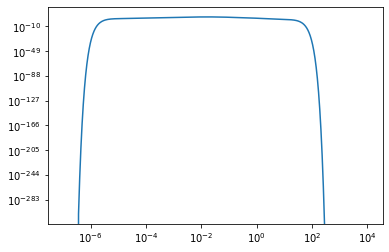

In [33]:
aper = 1.00
apar = 1.00
f = 0.8
b1 = 2.0
b2 = -0.3
bg2 = -(2./7.)*(b1 - 1.)
bT3 = (101./42.)*(b1 - 1.)
FoG = 5.0
st = np.linspace(0.5,199.5,200)
#dictp = model.pk_multipoles(aper, apar, f, b1, b2,bg2,bT3, FoG)
dictp = model.pk_multipoles(aper, apar, f,b1,b2,bg2,bT3, FoG)

dictm = model.xi_multipoles(s=st)
plt.loglog(dictp['k'],dictp['p0'])
#plt.xlim(10,100)

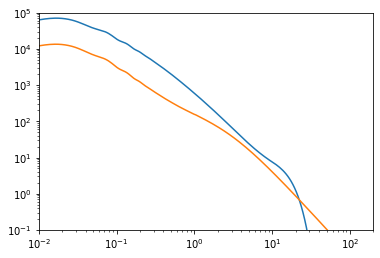

In [34]:
plt.xlim(1e-2,2e2)
plt.ylim(1e-1,1e5)
plt.loglog(dictp['k'],dictp['p0'])
plt.loglog(theory['k'],theory['Pdd'])

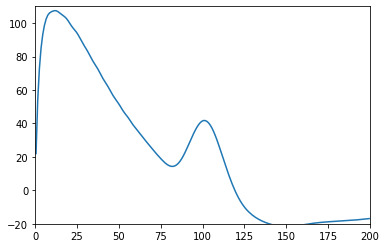

In [35]:
plt.xlim(0,200)
plt.ylim(-20,110)
plt.plot(dictm['s'],np.real(dictm['xi0'])*dictm['s']**2)
#plt.plot(s,np.real(xi0)*s**2)

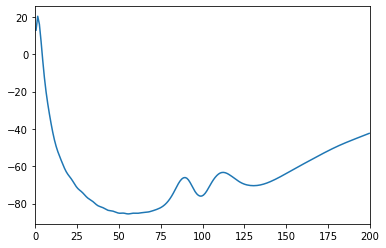

In [36]:
#plt.plot(dictm['s'],dictm['xi2']*dictm['s']**2)
plt.xlim(0,200)
#plt.ylim(-70,20)
plt.plot(dictm['s'],dictm['xi2']*dictm['s']**2)

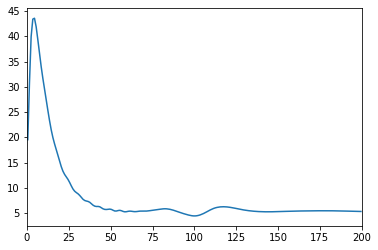

In [37]:
plt.xlim(0,200)
plt.plot(dictm['s'],dictm['xi4']*dictm['s']**2)


In [11]:
%%time
rr,DeltaSigma = model.DeltaSigma(1.,0.5,1,-1,r0=0.)



CPU times: user 24 ms, sys: 4.52 ms, total: 28.6 ms
Wall time: 11.5 ms


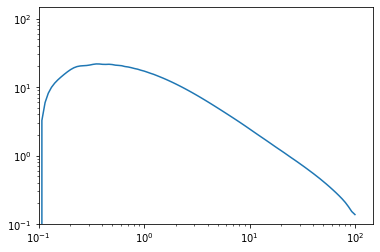

In [12]:
plt.xlim(0.1,1.5e2)
plt.ylim(1e-1,1.5e2)

#plt.loglog(rr,DeltaSigma_cut)
plt.loglog(rr,DeltaSigma)
#plt.loglog(rr2,DeltaSigma2)